# BIOS512 Final Project

## Gaby Zuckerman (onyen: gmz0512, PID: 730169801)

### Introduction

When searching for a dataset to use for this project, I was drawn to one particular dataset from the FiveThirtyEight website. The dataset, which can be found [here](https://github.com/fivethirtyeight/data/tree/master/scrabble-games), contains data from over 1.5 million scrabble games between 1973 and 2017.  *Scrabble* is a word game in which two to four players score points by placing tiles, each bearing a single letter, onto a game board divided into a 15×15 grid of squares. 

For this project, the "scrabble-games" dataset was used in order to answer interesting questions about Scrabble tournaments between 1973-2017. As someone who grew up playing Scrabble with friends and family, I wanted to use this dataset to see how Scrabble at the professional level has changed over time with regard to: number of tournaments, average winning score by lexicon, and percentages of games that were upsets in each tournament decade.  

### Initial Importing

##### Import the tidyverse and other relevant packages

In [18]:
library("tidyverse")
library("ggthemes") 

##### Import the scrabble-games dataset

In [4]:
scrabble <- read.csv("scrabble_games.txt") 

### Data Cleaning and Manipulation

This next section will go through the data manipulations necessary in order to produce my desired visualizations. It will be divided by the three topics introduced in the introduction. They are:
1. Number of tournaments per year
2. Average winning score per year by lexicon
3. Percentage of games that were upsets by decade

#### 1. Number of tournaments per year

In [5]:
scrabble$year <- substring(scrabble$date, 1, 4)

n_tourney <- scrabble %>%
  group_by(year, tourneyid) %>% 
  arrange(year, tourneyid) %>%
  summarize()
  
n_tourney <- n_tourney %>% summarize(n = n())

`summarise()` regrouping output by 'year' (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



#### 2. Average winning score per year by lexicon

In [30]:
df_lexicon <- scrabble %>%
  filter(winnerscore > 0 & loserscore > 0) %>%
  group_by(year, lexicon) %>%
  summarize(avg_score = mean(winnerscore)) %>% 
  filter(year > 1990) 

df_lexicon$lexicon[df_lexicon$lexicon == "False"] <- "North American"
df_lexicon$lexicon[df_lexicon$lexicon == "True"] <- "International"

`summarise()` regrouping output by 'year' (override with `.groups` argument)



NOTE: In the above code, only years above 1990 were included because there were no games in the dataset that utilized the international lexicon prior to 1991.

#### 3. Percentage of games that were upsets by decade

In [7]:
scrabble_scores <- scrabble %>%
  filter(!is.na(winneroldrating) & !is.na(loseroldrating)) %>%
  filter(winneroldrating != loseroldrating) %>%
  mutate(upset = (winneroldrating - loseroldrating) < 0) 

num_games <- scrabble_scores %>%
  group_by(year, tourneyid) %>%
  summarize(num_games = n())
  
num_upsets <- scrabble_scores %>%
  filter(year > 1979) %>%
  group_by(year,tourneyid,upset) %>%
  arrange(year, tourneyid) %>%
  summarize(num_upsets = n()) 

num_upsets <- num_upsets %>% filter(upset == TRUE) %>% filter(year > 1979)

upsets_per_tourney <- merge(num_games, num_upsets, by = c("year","tourneyid"))
upsets_per_tourney <- upsets_per_tourney %>% 
  mutate(upsets_per_games = num_upsets / num_games)

upsets_per_tourney$year <- as.numeric(upsets_per_tourney$year)

upsets_per_tourney$decade <- NA
upsets_per_tourney$decade[upsets_per_tourney$year > 1979 & upsets_per_tourney$year < 1990] <- "1980s"
upsets_per_tourney$decade[upsets_per_tourney$year > 1989 & upsets_per_tourney$year < 2000] <- "1990s"
upsets_per_tourney$decade[upsets_per_tourney$year > 1999 & upsets_per_tourney$year < 2010] <- "2000s"
upsets_per_tourney$decade[upsets_per_tourney$year > 2009 & upsets_per_tourney$year < 2020] <- "2010s"

`summarise()` regrouping output by 'year' (override with `.groups` argument)

`summarise()` regrouping output by 'year', 'tourneyid' (override with `.groups` argument)



### Data Visualization

This next section will use the datasets produced above to produce my desired visualizations. It will be divided by the three topics introduced in the introduction. They are:
1. Number of tournaments per year
2. Average winning score per year by lexicon
3. Percentage of games that were upsets by decade

#### 1. Number of tournaments per year

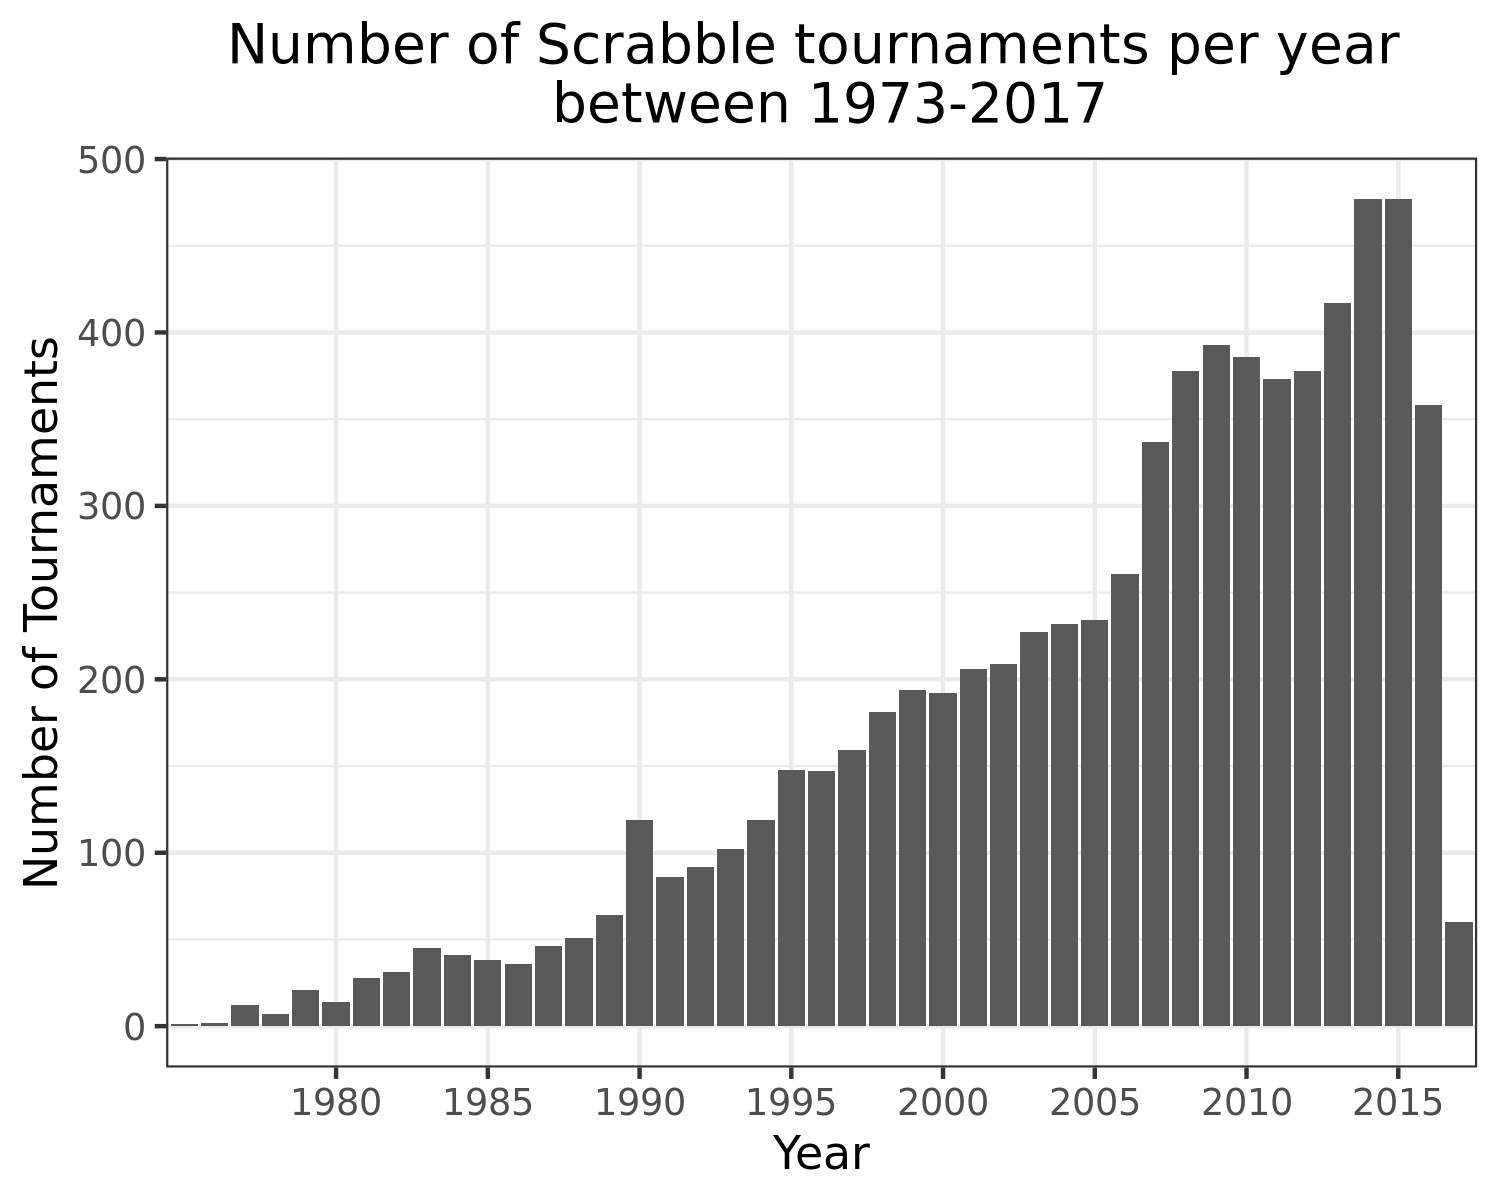

In [23]:
options(repr.plot.width = 5, repr.plot.height = 4, repr.plot.res = 300)

p1 = ggplot(n_tourney, aes(x = year, y = n)) + 
    geom_col() +
    labs(title = "Number of Scrabble tournaments per year \n between 1973-2017", x = "Year", y = "Number of Tournaments") + 
    scale_x_discrete(breaks = c("1980","1985","1990","1995","2000","2005","2010","2015")) + 
    theme_bw() + 
    theme(plot.title = element_text(hjust = 0.5))

p1

For my first visualization, I wanted to assess two things.
1. Has the number of *Scrabble* tournaments per year increased over time?
2. Due to technological innovations, is the *Scrabble* dataset more likely to contain more data from recent years?

Therefore, I calculated the number of tournaments per year between 1973 and 2017. I found that the number of tournaments per year had an increasing trend over time. This could reflect either of the possibilities listed above. This would imply either or both of the following:
* *Scrabble* has increased in popularity around the world over time, leading to more tournaments being held.
* Data could only be found for tournaments in recent years, which are more available due to an increased ease of data sharing as time passes.


#### 2. Average winning score per year by lexicon

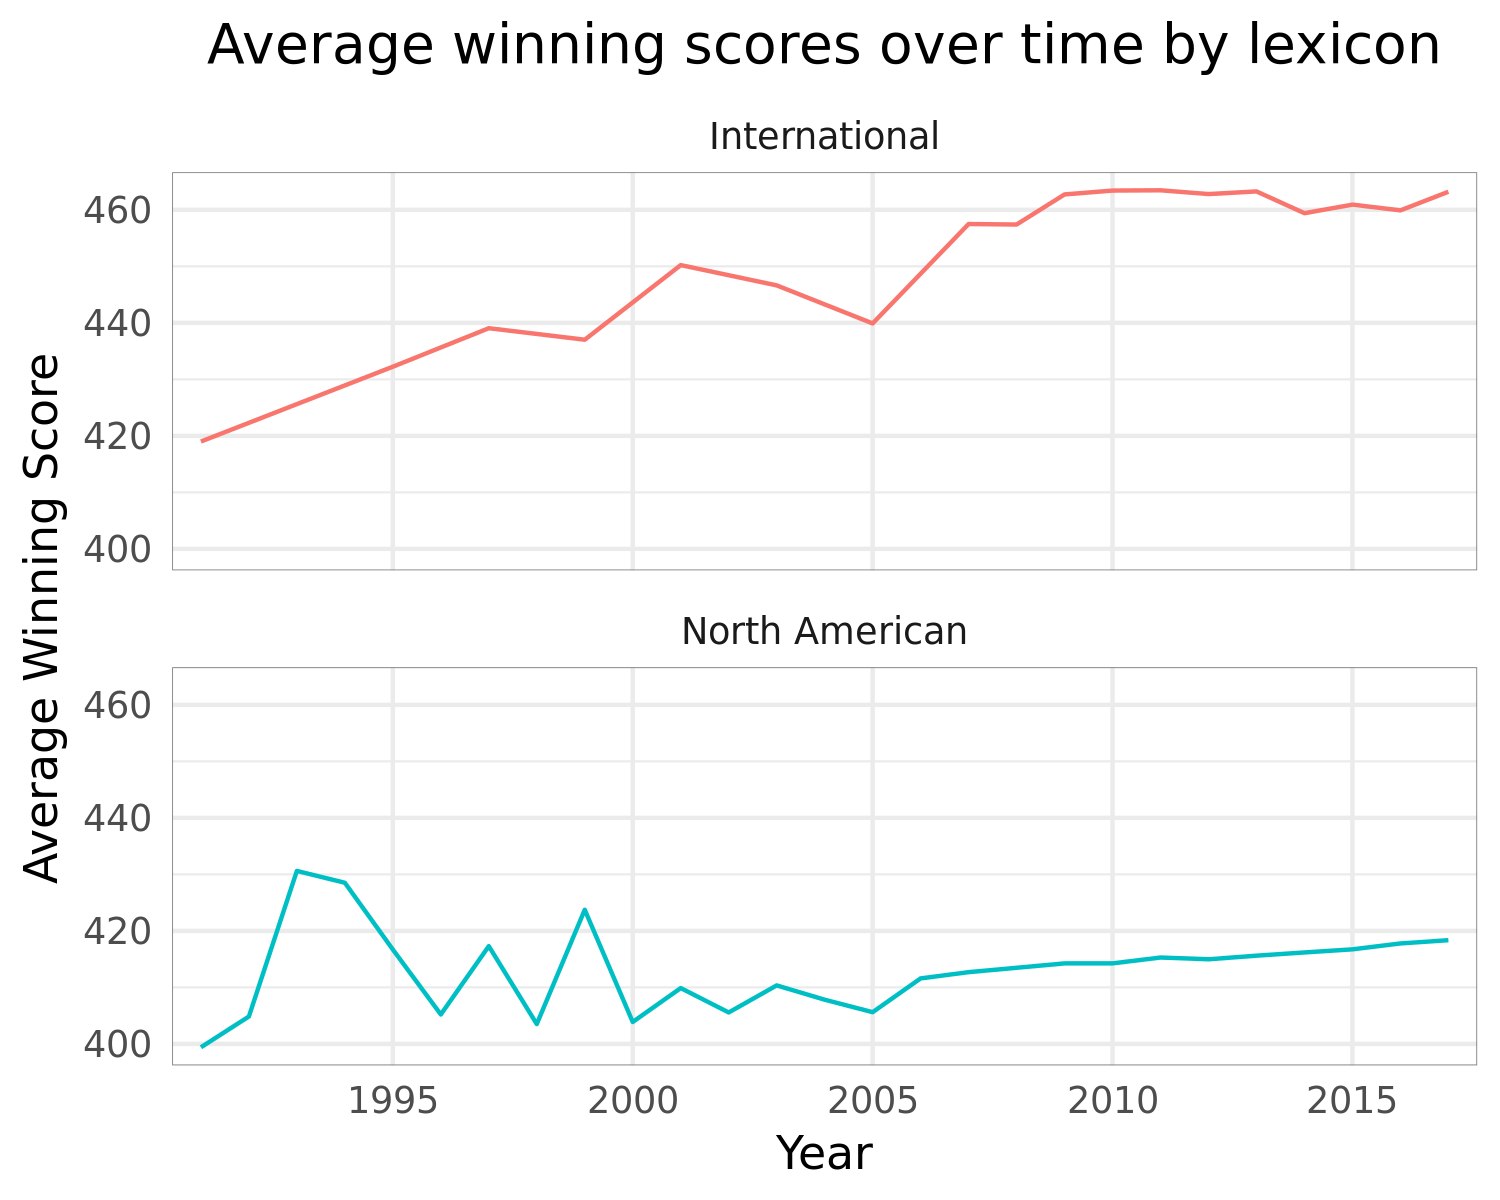

In [31]:
options(repr.plot.width = 5, repr.plot.height = 4, repr.plot.res = 300)

p2 = ggplot(df_lexicon, aes(x = year, y = avg_score, group = lexicon, color = lexicon)) + 
    geom_line() + 
    facet_wrap(~lexicon, ncol = 1) + 
    labs(title = "Average winning scores over time by lexicon", x = "Year", y = "Average Winning Score", color = "Lexicon") +
    scale_x_discrete(breaks = c("1990","1995","2000","2005","2010","2015")) +
    theme_minimal() + 
    theme(panel.border = element_rect(colour = "gray50", fill = NA, size = 0.2),
          legend.position = "none", 
          plot.title = element_text(hjust = 0.5)) 

p2 

One of the variables in the *Scrabble* dataset is a logical variable indicating if a game's lexicon was North American or international. Most scrabble enthusiasts know that many of the top-ranked scrabble players are not actually English speakers. They instead memorize lists of words without learning their meaning. Thus, for my second visualization, I wanted to see if there was a difference in average winning scores over time by lexicon. 

In the above visualization, we see that, average winning scores for games that use the international lexicon have steadily increased over time and range between approximately 420 to 465. Contrastingly, the average winning scores in games played using the North American lexicon peaked in the early 1990s at 430 and have since stayed between 400 to 425. Thus, we see that, on average, games that use the international lexicon in *Scrabble* have higher winning scores than games played using the North American lexicon.

#### 3. Percentage of games that were upsets by decade

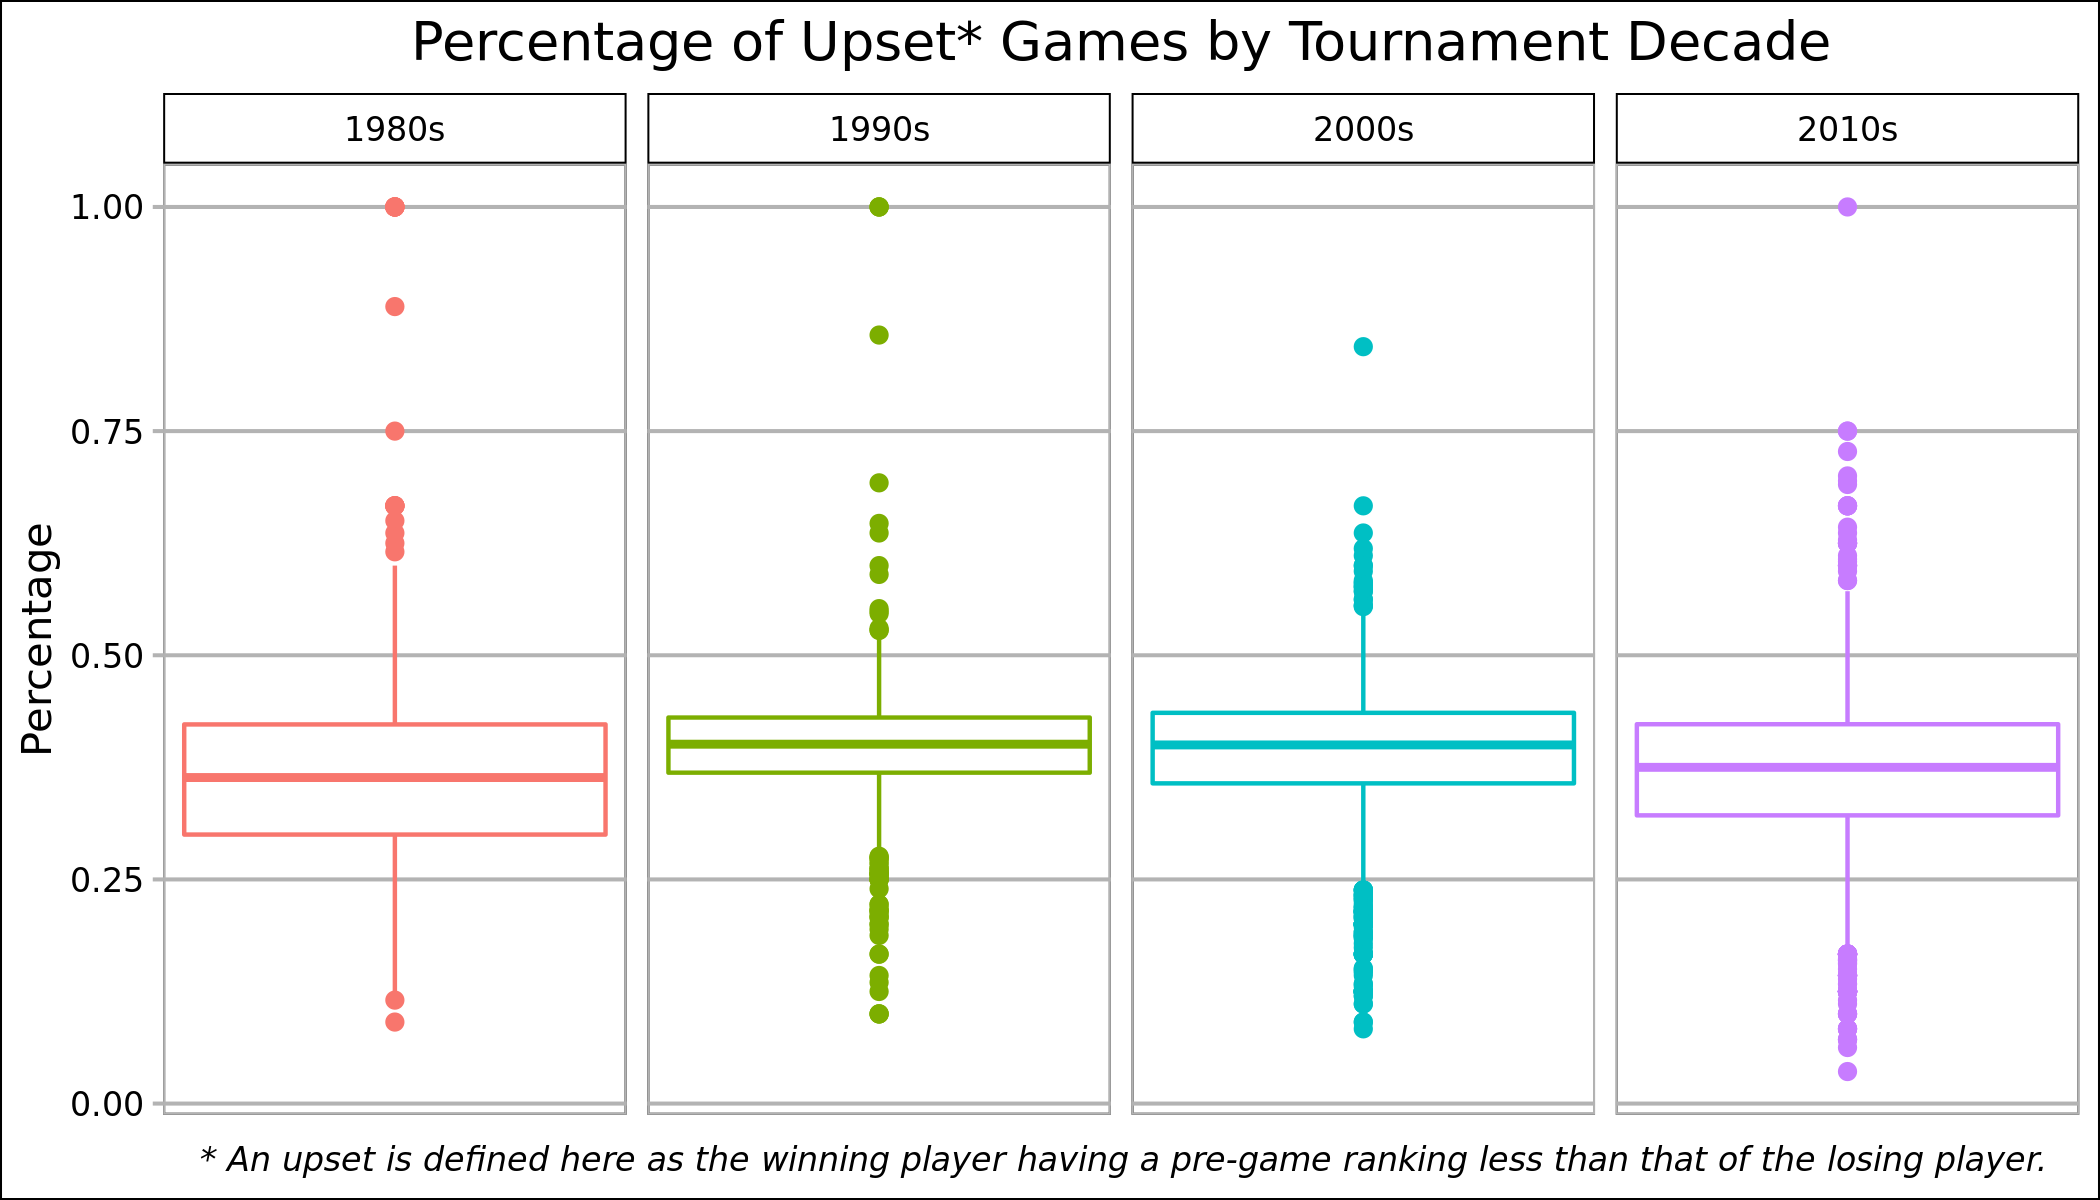

In [21]:
options(repr.plot.width = 7, repr.plot.height = 4, repr.plot.res = 300)

p3 = ggplot(upsets_per_tourney, aes(x = year, y = upsets_per_games, group = decade, color = decade)) + 
    geom_boxplot() + 
    labs(title = "Percentage of Upset* Games by Tournament Decade", x = "", y = "Percentage",
         caption = "* An upset is defined here as the winning player having a pre-game ranking less than that of the losing player.") + 
    facet_grid(~decade, scales = "free_x") +
    theme_calc() +
    theme(plot.title = element_text(hjust = 0.5),
          plot.caption = element_text(hjust = 0.5, face = "italic"),
          axis.ticks.x = element_blank(),
          axis.text.x = element_blank(),
          axis.title.x = element_blank(),
          legend.position = "none")

p3

Each player in a Scrabble tournament is given a numerical rating, with higher ratings predicting more wins in a tournament. Their rating is determined by their win-loss record (with ties counting as 1/2 of a win), the ratings of their previous opponents, and their rating going into the tournament. A rating reflects how likely a player is to perform in a tournament, including winning games against other opponents in their division. Thus, for my final visualization, I wanted to see, how often player's ratings have been incorrect. In order to assess this, I created an "upset" variable for each game where the winner's rating going into the game was lower than the loser's rating going into the game. For each decade in the dataset (excluding the 1970s due to limited data points), I then found the percentage of games per tournament that were upsets. The graph above shows the numerical distribution of the percentages of games that upsets for the 1980s, 1990s, 2000s, and 2010s. We see that, on average, about 35-40% of games per tournament were upsets in all four decades.